In [335]:
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans
import pandas as pd
import datetime as dt
import pytz
from jdatetime import datetime, date
import streamlit as st

In [337]:
# Connect to the database
cnx = mysql.connector.connect(
    host="localhost",
    user="newuser",
    password="12345678",
    database="laptop_analysis_and_warehousing"
)

cursor = cnx.cursor()

In [339]:
query = """
select l.Manufacturer, l.Category, o.Total_Price, o.Quantity, o.Order_id, o.Order_Date
from laptop l
         join `order` o on l.laptop_id = o.laptop_id
"""

data = pd.read_sql_query(query, cnx)
data

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_4196\606887657.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, cnx)


,Manufacturer,Category,Total_Price,Quantity,Order_id,Order_Date
0,Dell,Notebook,3450000.0,1,0,1396-10-26
1,Dell,Notebook,1100000.0,1,20,1391-01-20
2,Dell,Notebook,15580000.0,1,72,1401-02-09
3,Dell,Notebook,20150000.0,1,204,1400-05-25
4,Dell,Notebook,4250000.0,1,297,1397-02-30
...,...,...,...,...,...,...
1017076,HP,Notebook,1150000.0,1,926808,1394-12-24
1017077,HP,Notebook,1350000.0,1,944117,1396-07-15
1017078,HP,Notebook,15150000.0,1,987849,1401-11-25
1017079,HP,Notebook,8950000.0,1,1006977,1401-05-27


In [340]:
data[data['Quantity'] == 2]

,Manufacturer,Category,Total_Price,Quantity,Order_id,Order_Date
7,Dell,Notebook,5300000.0,2,647,1396-05-09
10,Dell,Notebook,3895000.0,2,851,1392-11-15
56,Dell,Notebook,33400000.0,2,3781,1399-11-30
61,Dell,Notebook,14400000.0,2,4054,1397-05-14
88,Dell,Notebook,2700000.0,2,6173,1391-05-14
...,...,...,...,...,...,...
1017019,HP,Notebook,19700000.0,2,367453,1400-07-08
1017021,HP,Notebook,9500000.0,2,449735,1398-02-07
1017054,HP,Notebook,3100000.0,2,767037,1396-11-29
1017065,HP,Notebook,2400000.0,2,834709,1394-05-19


In [341]:
data['Order_Date'] = data['Order_Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").togregorian().strftime("%Y-%m-%d"))
data

,Manufacturer,Category,Total_Price,Quantity,Order_id,Order_Date
0,Dell,Notebook,3450000.0,1,0,2018-01-16
1,Dell,Notebook,1100000.0,1,20,2012-04-08
2,Dell,Notebook,15580000.0,1,72,2022-04-29
3,Dell,Notebook,20150000.0,1,204,2021-08-16
4,Dell,Notebook,4250000.0,1,297,2018-05-20
...,...,...,...,...,...,...
1017076,HP,Notebook,1150000.0,1,926808,2016-03-14
1017077,HP,Notebook,1350000.0,1,944117,2017-10-07
1017078,HP,Notebook,15150000.0,1,987849,2023-02-14
1017079,HP,Notebook,8950000.0,1,1006977,2022-08-18


In [342]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017081 entries, 0 to 1017080
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Manufacturer  1017081 non-null  object        
 1   Category      1017081 non-null  object        
 2   Total_Price   1017081 non-null  float64       
 3   Quantity      1017081 non-null  int64         
 4   Order_id      1017081 non-null  int64         
 5   Order_Date    1017081 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 46.6+ MB


In [344]:
from datetime import timedelta, datetime
pin_date = max(data['Order_Date']) + dt.timedelta(1)
pin_date

Timestamp('2023-10-12 00:00:00')

In [393]:
snapshot_date = data['Order_Date'].max()  
data['Recency'] = (snapshot_date - data['Order_Date']).dt.days

rfm = data.groupby(['Manufacturer', 'Category']).agg({
    'Order_Date': lambda x: (pin_date - x.max()).days,  
    'Quantity': 'count', 
    'Total_Price': 'sum' 
}).reset_index()
rfm

,Manufacturer,Category,Order_Date,Quantity,Total_Price
0,Acer,2 in 1 Convertible,1,7472,9.193572e+10
1,Acer,Gaming,1,10614,1.498665e+11
2,Acer,Netbook,8,302,9.828180e+08
3,Acer,Notebook,1,43651,4.123173e+11
4,Acer,Ultrabook,1,7367,8.900572e+10
5,Apple,Ultrabook,1,17878,3.120022e+11
6,Asus,2 in 1 Convertible,2,12316,1.795778e+11
7,Asus,Gaming,1,36997,6.971286e+11
8,Asus,Netbook,16,415,1.512011e+09
9,Asus,Notebook,1,44247,5.162066e+11


In [394]:
# rfm['Category']

In [395]:
rfm.columns = ['Manufacturer', 'Category', 'Recency', 'Frequency', 'Monetary']
rfm

,Manufacturer,Category,Recency,Frequency,Monetary
0,Acer,2 in 1 Convertible,1,7472,9.193572e+10
1,Acer,Gaming,1,10614,1.498665e+11
2,Acer,Netbook,8,302,9.828180e+08
3,Acer,Notebook,1,43651,4.123173e+11
4,Acer,Ultrabook,1,7367,8.900572e+10
5,Apple,Ultrabook,1,17878,3.120022e+11
6,Asus,2 in 1 Convertible,2,12316,1.795778e+11
7,Asus,Gaming,1,36997,6.971286e+11
8,Asus,Netbook,16,415,1.512011e+09
9,Asus,Notebook,1,44247,5.162066e+11


In [396]:
rdm_copy = rfm.copy()
rdm_copy

,Manufacturer,Category,Recency,Frequency,Monetary
0,Acer,2 in 1 Convertible,1,7472,9.193572e+10
1,Acer,Gaming,1,10614,1.498665e+11
2,Acer,Netbook,8,302,9.828180e+08
3,Acer,Notebook,1,43651,4.123173e+11
4,Acer,Ultrabook,1,7367,8.900572e+10
5,Apple,Ultrabook,1,17878,3.120022e+11
6,Asus,2 in 1 Convertible,2,12316,1.795778e+11
7,Asus,Gaming,1,36997,6.971286e+11
8,Asus,Netbook,16,415,1.512011e+09
9,Asus,Notebook,1,44247,5.162066e+11


In [397]:
from sklearn.preprocessing import StandardScaler
rdm_copy = rdm_copy.drop('Manufacturer', axis=1).drop('Category', axis=1)

In [398]:
scaler = StandardScaler()
scaled = scaler.fit_transform(rdm_copy)

C:\Users\Fatemeh\PycharmProjects\pythonProject14\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Fatemeh\PycharmProjects\pythonProject14\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Fatemeh\PycharmProjects\pythonProject14\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Fatemeh\PycharmProjects\pythonProject14\venv\lib\site-packages\sklearn\cluster\

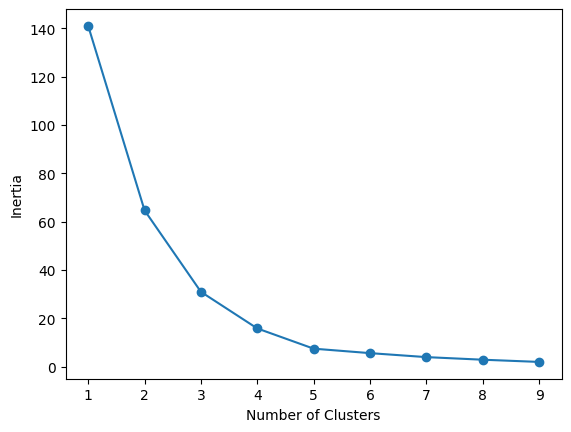

In [399]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for i in np.arange(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.plot(np.arange(1, 10), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [400]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)
rdm_copy['cluster'] = (kmeans.labels_)
rdm_copy

C:\Users\Fatemeh\PycharmProjects\pythonProject14\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Recency,Frequency,Monetary,cluster
0,1,7472,9.193572e+10,0
1,1,10614,1.498665e+11,0
2,8,302,9.828180e+08,0
3,1,43651,4.123173e+11,0
4,1,7367,8.900572e+10,0
5,1,17878,3.120022e+11,0
6,2,12316,1.795778e+11,0
7,1,36997,6.971286e+11,0
8,16,415,1.512011e+09,0
9,1,44247,5.162066e+11,0


In [403]:
# cluster_avg = rdm_copy.groupby(['cluster']).mean() 
# population_avg = rfm.mean()
# relative_imp = cluster_avg / population_avg - 1
# relative_imp.round(2)

In [353]:
# unique_recency_values = rfm['Recency'].nunique()
# print(unique_recency_values)

In [354]:
unique_recency_values = np.array(rfm['Recency'].unique())
print(sorted(unique_recency_values))

[1, 2, 3, 4, 6, 7, 8, 9, 15, 16, 17, 30, 55]


In [355]:
# unique_recency_values = rfm['Frequency'].unique()
# print(unique_recency_values)

In [356]:
# unique_recency_values = rfm['Monetary'].unique()
# print(np.array(unique_recency_values))

In [357]:
import numpy as np

unique_values = np.array(rfm['Recency'].unique())
bin_labels = ['1', '2', '3', '4']

def assign_bin_label(value):
    if value <= 3.5:
        return bin_labels[0]
    elif value <= 8:
        return bin_labels[1]
    elif value <= 16.5:
        return bin_labels[2]
    else:
        return bin_labels[3]

rfm['R'] = rfm['Recency'].map(assign_bin_label)


In [358]:
# unique_values = np.array([7472, 10614, 302, 43651, 7367, 17878, 12316, 36997, 415, 44247, 21555, 544, 27320, 29019, 1152, 155580, 44599, 3306, 3333, 1931, 12576, 10669, 1534, 171208, 26449, 2874, 1682, 726, 32120, 30902, 1061, 132374, 25290, 707, 35287, 106, 983, 4681, 538, 2179, 4035, 87, 484, 36125, 7178, 419, 5209])
# bin_labels = ['1', '2', '3', '4']

# # Define a function to map unique values to bin labels
# def assign_bin_label(value):
#     if value <= 1000:
#         return bin_labels[0]
#     elif value <= 5000:
#         return bin_labels[1]
#     elif value <= 20000:
#         return bin_labels[2]
#     else:
#         return bin_labels[3]

# rfm['F'] = rfm['Frequency'].map(assign_bin_label)

In [359]:
# array = np.array([0, 7, 1, 15, 2, 5, 8, 3, 29, 14, 6, 54, 16])

# # Perform qcut with 4 bins (range 1 to 4)
# bins = pd.qcut(array, q=4, labels=range(1, 5))
# bins
# quantities = rfm.drop('Category', axis=1).drop('Manufacturer', axis=1).quantile(q=[0.25, 0.5, 0.75])
# quantities = quantities.to_dict()

In [360]:
# rfm['R'] = pd.qcut(rfm['Recency'], q=4, labels=range(2, 0, -1), duplicates='drop')
rfm['F'] = pd.qcut(rfm['Frequency'], q=4, labels=range(1, 5))
rfm['M'] = pd.qcut(rfm['Monetary'], q=4, labels=range(1, 5))
rfm

,Manufacturer,Category,Recency,Frequency,Monetary,R,F,M
0,Acer,2 in 1 Convertible,1,7472,9.193572e+10,1,3,3
1,Acer,Gaming,1,10614,1.498665e+11,1,3,3
2,Acer,Netbook,8,302,9.828180e+08,2,1,1
3,Acer,Notebook,1,43651,4.123173e+11,1,4,3
4,Acer,Ultrabook,1,7367,8.900572e+10,1,3,2
5,Apple,Ultrabook,1,17878,3.120022e+11,1,3,3
6,Asus,2 in 1 Convertible,2,12316,1.795778e+11,1,3,3
7,Asus,Gaming,1,36997,6.971286e+11,1,4,4
8,Asus,Netbook,16,415,1.512011e+09,3,1,1
9,Asus,Notebook,1,44247,5.162066e+11,1,4,4


In [361]:
rfm

,Manufacturer,Category,Recency,Frequency,Monetary,R,F,M
0,Acer,2 in 1 Convertible,1,7472,9.193572e+10,1,3,3
1,Acer,Gaming,1,10614,1.498665e+11,1,3,3
2,Acer,Netbook,8,302,9.828180e+08,2,1,1
3,Acer,Notebook,1,43651,4.123173e+11,1,4,3
4,Acer,Ultrabook,1,7367,8.900572e+10,1,3,2
5,Apple,Ultrabook,1,17878,3.120022e+11,1,3,3
6,Asus,2 in 1 Convertible,2,12316,1.795778e+11,1,3,3
7,Asus,Gaming,1,36997,6.971286e+11,1,4,4
8,Asus,Netbook,16,415,1.512011e+09,3,1,1
9,Asus,Notebook,1,44247,5.162066e+11,1,4,4


In [362]:
rfm[['R', 'F', 'M']] = rfm[['R', 'F', 'M']].astype(int)
rfm['RFM_Group'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)
rfm

,Manufacturer,Category,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
0,Acer,2 in 1 Convertible,1,7472,9.193572e+10,1,3,3,133,7
1,Acer,Gaming,1,10614,1.498665e+11,1,3,3,133,7
2,Acer,Netbook,8,302,9.828180e+08,2,1,1,211,4
3,Acer,Notebook,1,43651,4.123173e+11,1,4,3,143,8
4,Acer,Ultrabook,1,7367,8.900572e+10,1,3,2,132,6
5,Apple,Ultrabook,1,17878,3.120022e+11,1,3,3,133,7
6,Asus,2 in 1 Convertible,2,12316,1.795778e+11,1,3,3,133,7
7,Asus,Gaming,1,36997,6.971286e+11,1,4,4,144,9
8,Asus,Netbook,16,415,1.512011e+09,3,1,1,311,5
9,Asus,Notebook,1,44247,5.162066e+11,1,4,4,144,9


In [366]:
level = ['lost','low_used','medium_used','most_used']
score = pd.qcut(rfm.RFM_Score, q=4, labels=level)
rfm['level'] = score.values
rfm

,Manufacturer,Category,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,level
0,Acer,2 in 1 Convertible,1,7472,9.193572e+10,1,3,3,133,7,medium_used
1,Acer,Gaming,1,10614,1.498665e+11,1,3,3,133,7,medium_used
2,Acer,Netbook,8,302,9.828180e+08,2,1,1,211,4,lost
3,Acer,Notebook,1,43651,4.123173e+11,1,4,3,143,8,medium_used
4,Acer,Ultrabook,1,7367,8.900572e+10,1,3,2,132,6,low_used
5,Apple,Ultrabook,1,17878,3.120022e+11,1,3,3,133,7,medium_used
6,Asus,2 in 1 Convertible,2,12316,1.795778e+11,1,3,3,133,7,medium_used
7,Asus,Gaming,1,36997,6.971286e+11,1,4,4,144,9,most_used
8,Asus,Netbook,16,415,1.512011e+09,3,1,1,311,5,lost
9,Asus,Notebook,1,44247,5.162066e+11,1,4,4,144,9,most_used


In [369]:
rfm = rfm.sort_values('RFM_Score', ascending=False)

In [370]:
rfm

,Manufacturer,Category,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,level
23,HP,Notebook,1,171208,2.213051e+12,1,4,4,144,9,most_used
31,Lenovo,Notebook,1,132374,1.605172e+12,1,4,4,144,9,most_used
7,Asus,Gaming,1,36997,6.971286e+11,1,4,4,144,9,most_used
13,Dell,Gaming,1,29019,5.102444e+11,1,4,4,144,9,most_used
34,MSI,Gaming,1,35287,6.683380e+11,1,4,4,144,9,most_used
15,Dell,Notebook,1,155580,1.912625e+12,1,4,4,144,9,most_used
43,Toshiba,Notebook,1,36125,5.587666e+11,1,4,4,144,9,most_used
16,Dell,Ultrabook,1,44599,8.094015e+11,1,4,4,144,9,most_used
29,Lenovo,Gaming,1,30902,4.785983e+11,1,4,4,144,9,most_used
28,Lenovo,2 in 1 Convertible,1,32120,5.415737e+11,1,4,4,144,9,most_used


In [382]:
total_price_sum = data[(data['Category'] == 'Notebook') & (data['Manufacturer'] == 'Samsung')]['Total_Price'].sum()
total_price_sum

11211913000.0

In [383]:
data[(data['Category'] == 'Notebook') & (data['Manufacturer'] == 'Samsung')]

,Manufacturer,Category,Total_Price,Quantity,Order_id,Order_Date,Recency
971787,Samsung,Notebook,10900000.0,1,2716,2018-05-14,1976
971788,Samsung,Notebook,5500000.0,1,3790,2015-07-19,3006
971789,Samsung,Notebook,6450000.0,1,4588,2017-07-06,2288
971790,Samsung,Notebook,5950000.0,1,5440,2013-04-19,3827
971791,Samsung,Notebook,5400000.0,1,5987,2014-06-23,3397
...,...,...,...,...,...,...,...
972266,Samsung,Notebook,17800000.0,1,1009299,2018-08-24,1874
972267,Samsung,Notebook,5510000.0,1,1009415,2015-03-05,3142
972268,Samsung,Notebook,46800000.0,1,1012376,2021-09-27,744
972269,Samsung,Notebook,5000000.0,1,1012938,2014-01-19,3552


In [371]:
df = pd.DataFrame(rfm, columns=rfm.columns)
# st.title('Request 4')
# st.table(df)
df.to_csv('request4.csv', encoding='utf-8', index=False)

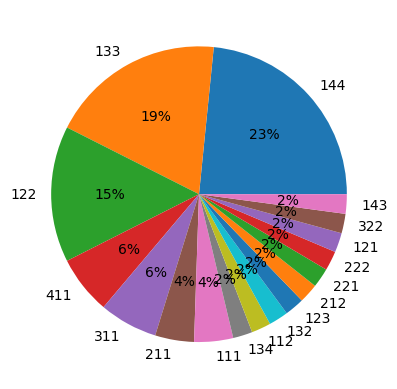

In [314]:
plt.pie(rfm.RFM_Score.value_counts(),
        labels=rfm.RFM_Score.value_counts().index,
        autopct='%.0f%%')
plt.show()

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_4196\2834862300.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Recency'])
C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_4196\2834862300.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm['Frequency'])
C:\Users\Fatemeh\AppData\Local\Tem

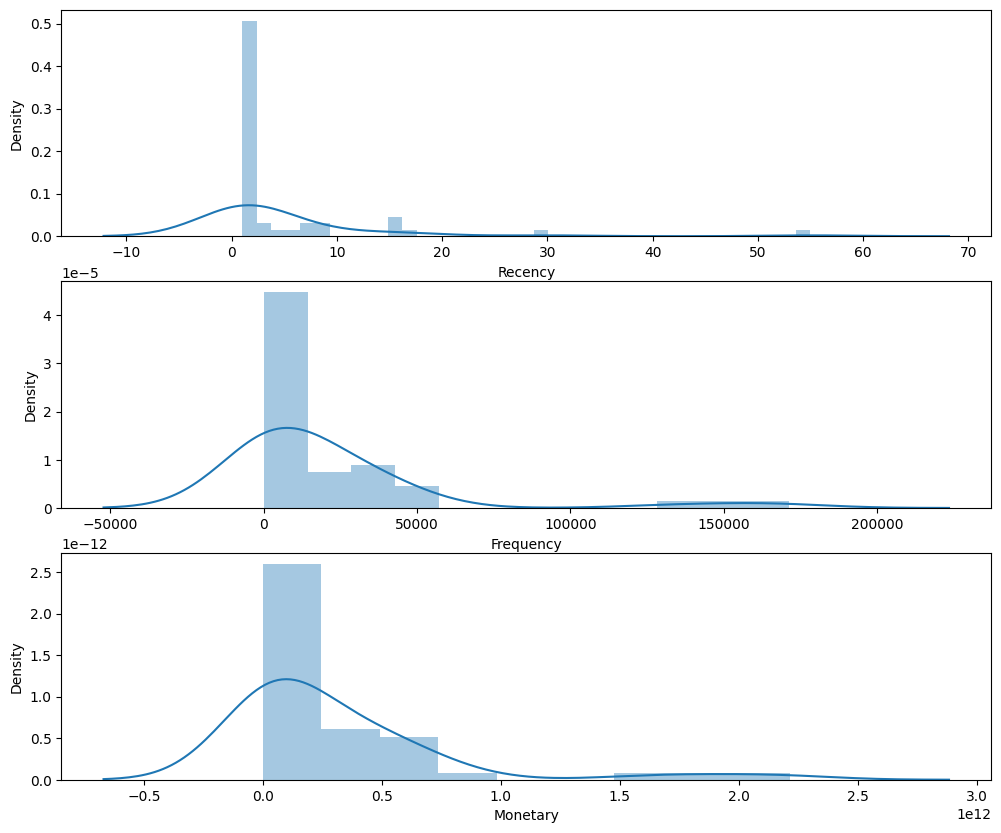

In [386]:
import seaborn as sns
plt.figure(figsize=(12,10))
# Plot distribution of Recency
plt.subplot(3, 1, 1)
sns.distplot(rfm['Recency'])
# Plot distribution of Frequency
plt.subplot(3, 1, 2)
sns.distplot(rfm['Frequency'])
# Plot distribution of Monetary
plt.subplot(3, 1, 3)
sns.distplot(rfm['Monetary'])
# Show the plot
plt.show()